In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os; os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
from tensorflow import keras

2023-05-24 13:59:07.008240: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-24 13:59:07.121713: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 13:59:08.097051: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2023-05-24 13:59:09.228690: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-24 13:59:09.281463: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-24 13:59:09.281502: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-24 13:59:09.293030: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-24 13:59:09.293089: I tensorflow/compile

553467096/553467096 [==============================] - 12s 0us/step


2023-05-24 13:59:46.668043: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8901
2023-05-24 13:59:53.828727: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 18s 18s/step


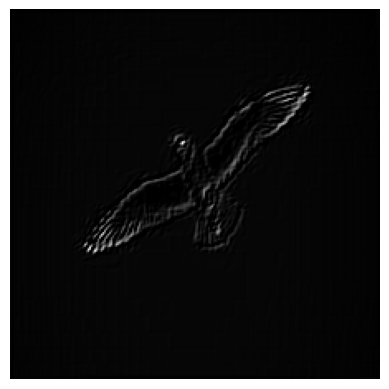

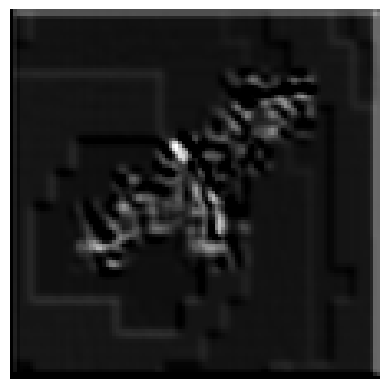

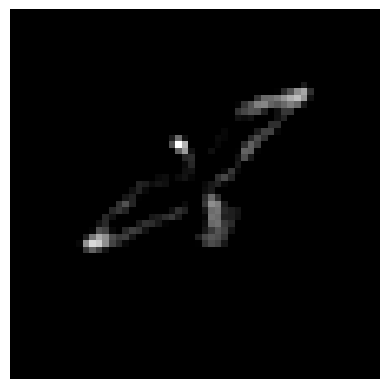

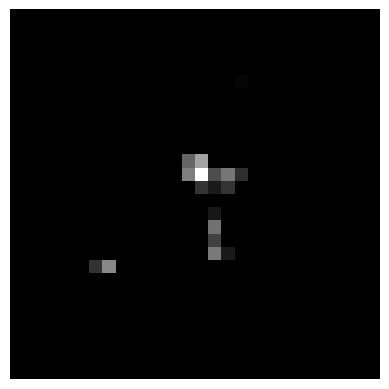

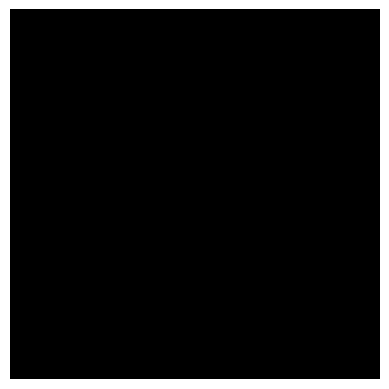

In [2]:
model = keras.applications.VGG16()
outputs = [model.layers[i].output for i in [2, 5, 9, 13, 17]]
model = keras.Model(inputs=model.inputs, outputs=outputs)
img = keras.utils.load_img('data/bird.jpg', target_size=(224, 224))
img = keras.utils.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = keras.applications.vgg16.preprocess_input(img)
feature_maps = model.predict(img)
for feature_map in feature_maps:
    fig = plt.figure()
    for i in range(1):
        ax = plt.subplot(1, 1, i+1)
        plt.imshow(feature_map[0, :, :, i], cmap='gray')
        plt.axis('off')
    plt.show()